Name: Yosriko Rahmat Karoni Sabelekake

Dataset Source: https://data.mendeley.com/datasets/945z9xkc8d/1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kt
from keras_tuner import RandomSearch
from google.colab import drive
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Self Projet NLP/train - train (1).csv')
df_val = pd.read_csv('/content/drive/MyDrive/Self Projet NLP/test - test.csv')
df_train.shape
df_train.head()
labels = df_train.label
labels.head()
print(df_train)



                                                    text  label
0      dark agenda behind globalism open border altma...      0
1      america poor still get shaft sami jamil jadall...      0
2      number accuser grow former miss finland accuse...      0
3      heroic prego advertisement replaces refresh we...      0
4      russia syria debbie reynolds thursday even bri...      1
...                                                  ...    ...
16641  comment cost selfdriving taxi really sixtyseve...      0
16642  interest duterte get billion china get money j...      0
16643  forget encyclopaedia get pokiespedia home win ...      0
16644  u election race huma abedin connection minute ...      0
16645  shameful obama legacy white man beat viciously...      0

[16646 rows x 2 columns]


In [ ]:
# Mengisi nilai yang hilang dengan string kosong
df_train['text'] = df_train['text'].fillna('')

# Mengonversi semua nilai ke string
df_train['text'] = df_train['text'].astype(str)
df_val['text'] = df_val['text'].fillna('')
df_val['text'] = df_val['text'].astype(str)

# Tokenisasi dan Padding
max_words = 1000
max_len = 50
tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
tokenizer.fit_on_texts(df_train['text'].values)

X_train = tokenizer.texts_to_sequences(df_train['text'].values)
X_train = pad_sequences(X_train, maxlen=max_len)

X_test = tokenizer.texts_to_sequences(df_val['text'].values)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = df_train['label'].values
y_test = df_val['label'].values

# Memastikan data tidak ada lagi kesalahan tipe
print("Example of preprocessed text sequences (X_train):", X_train[:2])
print("Example of labels (y_train):", y_train[:2])


Example of preprocessed text sequences (X_train): [[270 379  60  13  55 555  26 362 262 362 139 527 254 255  65 131 264  52
  254 783   9 377 575  92 340 249   6 481 211   6 586  40 369   6 520 501
  679 382 270 355 194 104  38 112 199 988 608  24 163 250]
 [276 901 261 485 476  92 901 718 517 276 460 530 234  22   6 123  60 733
  511  22 791   4  28 356 181 191 609 901 519 528 295  19   9  27  20   9
   60 729   3  14 224 729 101 193 777 356  80 292  18 120]]
Example of labels (y_train): [0 0]


In [ ]:
#Keras tuner acc: 89%
# def build_model(hp):
#     model = Sequential()
#     model.add(Embedding(max_words, 128, input_length=max_len))
#     model.add(SpatialDropout1D(0.2))
#     model.add(LSTM(hp.Int('units', min_value=50, max_value=200, step=50), dropout=0.2, recurrent_dropout=0.2))
#     model.add(Dense(1, activation='sigmoid'))

#     model.compile(loss='binary_crossentropy',
#                   optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])),
#                   metrics=['accuracy'])
#     return model

# tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='output', project_name='LSTM_tuning')
# tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# best_model = tuner.get_best_models(num_models=1)[0]


# Membangun model dengan TensorFlow
model = keras.Sequential()
model.add(keras.layers.Embedding(max_words, 128, input_length=max_len))
model.add(keras.layers.SpatialDropout1D(0.2))
model.add(keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=2)



Epoch 1/10
261/261 - 114s - loss: 0.5235 - accuracy: 0.7453 - val_loss: 0.3824 - val_accuracy: 0.8235 - 114s/epoch - 439ms/step
Epoch 2/10
261/261 - 96s - loss: 0.3485 - accuracy: 0.8550 - val_loss: 0.3230 - val_accuracy: 0.8538 - 96s/epoch - 368ms/step
Epoch 3/10
261/261 - 94s - loss: 0.3086 - accuracy: 0.8713 - val_loss: 0.2952 - val_accuracy: 0.8729 - 94s/epoch - 359ms/step
Epoch 4/10
261/261 - 92s - loss: 0.2871 - accuracy: 0.8833 - val_loss: 0.2907 - val_accuracy: 0.8701 - 92s/epoch - 354ms/step
Epoch 5/10
261/261 - 96s - loss: 0.2647 - accuracy: 0.8945 - val_loss: 0.2682 - val_accuracy: 0.8857 - 96s/epoch - 368ms/step
Epoch 6/10
261/261 - 92s - loss: 0.2497 - accuracy: 0.8981 - val_loss: 0.2689 - val_accuracy: 0.8813 - 92s/epoch - 352ms/step
Epoch 7/10
261/261 - 95s - loss: 0.2424 - accuracy: 0.9039 - val_loss: 0.2707 - val_accuracy: 0.8850 - 95s/epoch - 366ms/step
Epoch 8/10
261/261 - 91s - loss: 0.2360 - accuracy: 0.9053 - val_loss: 0.2589 - val_accuracy: 0.8865 - 91s/epoch - 3

127/127 [==============================] - 4s 29ms/step


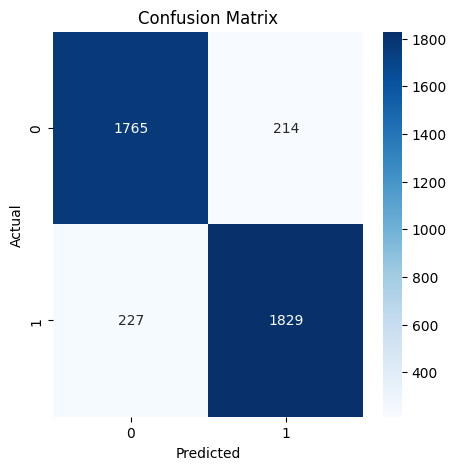

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1979
           1       0.90      0.89      0.89      2056

    accuracy                           0.89      4035
   macro avg       0.89      0.89      0.89      4035
weighted avg       0.89      0.89      0.89      4035

Accuracy:  0.8907063197026023


In [ ]:
# Evaluasi model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
